# Segmenting and Clustering Neighborhoods in Toronto (Part III)



We begin by importing necessary libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import urllib

Next we use the BeautifulSoup package for reading the required wikipedia page

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html_doc =  urllib.request.urlopen(url).read()
soup = BeautifulSoup(html_doc, 'html.parser')

Scrape the html document into a pandas data frame

In [5]:
table = soup.body.table
headers = table.find_all('th')

headers_list = [h.text.rstrip('\n') for h in headers]

cur_row = []
rows = []

for row in table.select('tr')[1:]:
    for col in row.select('td'):
        cur_row.append(col.text.rstrip('\n'))
    rows.append(cur_row)
    cur_row = []
    
df = pd.DataFrame(data = rows, columns = headers_list)

Apply the required formatting to the table

In [6]:
df = df[df.Borough.str.lower() != 'not assigned']

df['Neighbourhood'] = df.apply(lambda row: row.Neighbourhood if row.Neighbourhood.lower() != 'not assigned' else row.Borough, axis=1 ) 

df  = df.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(', '.join).reset_index()

df

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [6]:
df.shape

(103, 3)

One could run the below code for fetching longitude and latitude coordinates using the geocode API.

Unfortunately the API is unreliable - the queries appear to freeze and return nothing...

In [ ]:
import geocoder # import geocoder

def get_toronto_latitude_longitude_for_postal_code(postal_code):
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.google('{},Toronto, Ontario'.format(postal_code))
        lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude,  longitude

df["Latitude"], df["Longitude"] = zip(*df.apply(lambda p: get_toronto_latitude_longitude_for_postal_code(p), axis=1))

Let's read the provided csv file instead

In [7]:
df_latlng = pd.read_csv('Geospatial_Coordinates.csv')

df_latlng = df_latlng.rename(columns = {"Postal Code" : "Postcode"})

df_neigh_coord = df.join(df_latlng.set_index('Postcode'), on='Postcode')

df_neigh_coord

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [8]:
import json
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


Filter out neighbourhoods that do not belong to Toronto

In [14]:
df_toronto = df_neigh_coord[df_neigh_coord["Borough"].str.contains("Toronto")]
df_toronto

,Postcode,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
45,M4P,Central Toronto,Davisville North,43.712751,-79.390197
46,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
47,M4S,Central Toronto,Davisville,43.704324,-79.388790
48,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
49,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049


Foursquare credentials

In [12]:
CLIENT_ID = 'C2OXQIAFCD43SEP1PYKIG4MN54K2JVAESZPQZOCFTOGUM2EL' # your Foursquare ID
CLIENT_SECRET = 'ARD5EN2USUBI124JY3FFQLJJOEC1JOWVJVXFLRT1EYKL4S2C' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: C2OXQIAFCD43SEP1PYKIG4MN54K2JVAESZPQZOCFTOGUM2EL
CLIENT_SECRET:ARD5EN2USUBI124JY3FFQLJJOEC1JOWVJVXFLRT1EYKL4S2C


Top 100 venues within a 500 meter radius from each location

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
toronto_venues = getNearbyVenues(names=df_toronto['Neighbourhood'],
                                   latitudes=df_toronto['Latitude'],
                                   longitudes=df_toronto['Longitude']
                                  )
toronto_venues.head()

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The 

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Starbucks,43.678798,-79.298045,Coffee Shop
1,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
2,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [27]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"The Danforth West, Riverdale",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

,Neighbourhood,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,"Adelaide, King, Richmond",0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.00000,0.000000,0.010000,0.000000,0.000000,0.010000,0.000000,0.01,0.000000
1,Berczy Park,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,"Brockton, Exhibition Place, Parkdale Village",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,Business reply mail Processing Centre969 Eastern,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.00,0.000000,0.000000,0.071429,0.071429,0.071429,0.142857,0.142857,0.142857,...,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
5,"Cabbagetown, St. James Town",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
6,Central Bay Street,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.00000,0.000000,0.011364,0.000000,0.000000,0.011364,0.000000,0.00,0.011364
7,"Chinatown, Grange Park, Kensington Market",0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.00000,0.000000,0.050000,0.000000,0.050000,0.010000,0.000000,0.00,0.000000
8,Christie,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
9,Church and Wellesley,0.00,0.011364,0.011364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000,0.00000,0.000000,0.011364,0.011364,0.011364,0.000000,0.000000,0.00,0.011364


In [30]:
num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
                 venue  freq
0          Coffee Shop  0.07
1                 Café  0.05
2           Steakhouse  0.04
3  American Restaurant  0.04
4                  Bar  0.03


----Berczy Park----
            venue  freq
0     Coffee Shop  0.09
1    Cocktail Bar  0.05
2      Steakhouse  0.04
3      Restaurant  0.04
4  Farmers Market  0.04


----Brockton, Exhibition Place, Parkdale Village----
            venue  freq
0     Coffee Shop  0.14
1  Breakfast Spot  0.10
2            Café  0.10
3   Grocery Store  0.05
4          Bakery  0.05


----Business reply mail Processing Centre969 Eastern----
           venue  freq
0     Comic Shop  0.06
1  Auto Workshop  0.06
2           Park  0.06
3     Restaurant  0.06
4  Moving Target  0.06


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
              venue  freq
0    Airport Lounge  0.14
1  Airport Terminal  0.14
2   Airport Service  0.14
3     Boat

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Steakhouse,American Restaurant,Breakfast Spot,Thai Restaurant,Cosmetics Shop,Hotel,Bar,Gym
1,Berczy Park,Coffee Shop,Cocktail Bar,Cheese Shop,Bakery,Steakhouse,Seafood Restaurant,Farmers Market,Restaurant,Café,Pub
2,"Brockton, Exhibition Place, Parkdale Village",Coffee Shop,Breakfast Spot,Café,Gym,Climbing Gym,Convenience Store,Burrito Place,Bar,Stadium,Bakery
3,Business reply mail Processing Centre969 Eastern,Park,Moving Target,Smoke Shop,Brewery,Light Rail Station,Spa,Farmers Market,Fast Food Restaurant,Burrito Place,Restaurant
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Lounge,Airport Terminal,Airport Service,Boutique,Sculpture Garden,Plane,Harbor / Marina,Airport Gate,Airport Food Court,Airport
5,"Cabbagetown, St. James Town",Coffee Shop,Restaurant,Market,Pub,Indian Restaurant,Bakery,Pizza Place,Italian Restaurant,Café,Butcher
6,Central Bay Street,Coffee Shop,Italian Restaurant,Café,Bubble Tea Shop,Middle Eastern Restaurant,Japanese Restaurant,Bar,Burger Joint,Sandwich Place,Sushi Restaurant
7,"Chinatown, Grange Park, Kensington Market",Café,Bar,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Chinese Restaurant,Mexican Restaurant,Bakery,Dumpling Restaurant,Coffee Shop,Dim Sum Restaurant
8,Christie,Café,Grocery Store,Park,Baby Store,Athletics & Sports,Italian Restaurant,Diner,Nightclub,Restaurant,Coffee Shop
9,Church and Wellesley,Japanese Restaurant,Coffee Shop,Burger Joint,Gay Bar,Sushi Restaurant,Restaurant,Men's Store,Mediterranean Restaurant,Pub,Gastropub


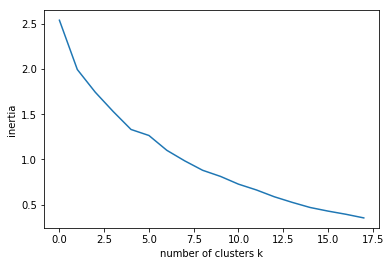

In [123]:
# find the best cluster size k
inertias = []
for k in range(2,20):
    toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)
    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(toronto_grouped_clustering)
    inertia = kmeans.inertia_
    inertias.append(inertia)
    
    
plt.plot(inertias)
plt.ylabel('inertia')
plt.xlabel('number of clusters k')
plt.show()

Based on the figure it appears that 4 clusters is the most appropriate selection for our model

In [156]:
kclusters = 4

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)
   
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

In [157]:
toronto_merged = df_toronto

# add clustering labels
toronto_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Postcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Neighborhood,Coffee Shop,Pub,Trail,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Design Studio,Donut Shop
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Ice Cream Shop,Coffee Shop,Bookstore,Italian Restaurant,Yoga Studio,Fruit & Vegetable Store,Pizza Place,Liquor Store,Juice Bar
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,0,Park,Coffee Shop,Sandwich Place,Steakhouse,Italian Restaurant,Fish & Chips Shop,Fast Food Restaurant,Liquor Store,Brewery,Burger Joint
43,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,Bakery,Italian Restaurant,Gastropub,American Restaurant,Yoga Studio,Cheese Shop,Juice Bar,Latin American Restaurant
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0,Dim Sum Restaurant,Bus Line,Park,Lake,Swim School,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


In [41]:
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

Solving environment: done

# All requested packages already installed.



In [43]:
address = 'Toronto, Ontario'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinates of Toronto are 43.653963, -79.387207.


In [158]:
# create map

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [159]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,The Beaches,0,Neighborhood,Coffee Shop,Pub,Trail,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Design Studio,Donut Shop
41,"The Danforth West, Riverdale",0,Greek Restaurant,Ice Cream Shop,Coffee Shop,Bookstore,Italian Restaurant,Yoga Studio,Fruit & Vegetable Store,Pizza Place,Liquor Store,Juice Bar
42,"The Beaches West, India Bazaar",0,Park,Coffee Shop,Sandwich Place,Steakhouse,Italian Restaurant,Fish & Chips Shop,Fast Food Restaurant,Liquor Store,Brewery,Burger Joint
43,Studio District,0,Café,Coffee Shop,Bakery,Italian Restaurant,Gastropub,American Restaurant,Yoga Studio,Cheese Shop,Juice Bar,Latin American Restaurant
44,Lawrence Park,0,Dim Sum Restaurant,Bus Line,Park,Lake,Swim School,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant
45,Davisville North,0,Park,Breakfast Spot,Food & Drink Shop,Hotel,Burger Joint,Sandwich Place,Yoga Studio,Diner,Ethiopian Restaurant,Electronics Store
46,North Toronto West,0,Coffee Shop,Sporting Goods Shop,Gym / Fitness Center,Health & Beauty Service,Fast Food Restaurant,Mexican Restaurant,Diner,Dessert Shop,Bagel Shop,Park
47,Davisville,0,Dessert Shop,Sandwich Place,Pizza Place,Pharmacy,Seafood Restaurant,Restaurant,Italian Restaurant,Café,Sushi Restaurant,Coffee Shop
48,"Moore Park, Summerhill East",0,Park,Playground,Tennis Court,Yoga Studio,Dessert Shop,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
49,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",0,Coffee Shop,Pub,Fried Chicken Joint,Pizza Place,Sushi Restaurant,Bagel Shop,Sports Bar,American Restaurant,Convenience Store,Vietnamese Restaurant


In [161]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
65,"The Annex, North Midtown, Yorkville",1,Sandwich Place,Coffee Shop,Café,Pizza Place,Park,BBQ Joint,Indian Restaurant,French Restaurant,Burger Joint,American Restaurant
68,"CN Tower, Bathurst Quay, Island airport, Harbo...",1,Airport Lounge,Airport Terminal,Airport Service,Boutique,Sculpture Garden,Plane,Harbor / Marina,Airport Gate,Airport Food Court,Airport


In [162]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
69,Stn A PO Boxes 25 The Esplanade,2,Coffee Shop,Café,Restaurant,Seafood Restaurant,Hotel,Cocktail Bar,Pub,Bakery,Burger Joint,Cheese Shop


In [163]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,Central Bay Street,3,Coffee Shop,Italian Restaurant,Café,Bubble Tea Shop,Middle Eastern Restaurant,Japanese Restaurant,Bar,Burger Joint,Sandwich Place,Sushi Restaurant


As expected most locations are dominated by coffe shops and cafés so they tend to cluster broadly.

Outside of these two factors the clustering is subjected to a lot of noise which makes it difficult to get any good separation between the neighbourhoods.

It is remarkable that the algorithm could not separate out e.g. Roselawn whose only venue is a Garden, very strange....